# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

The objective of this project was to develop a machine learning solution that predicts Customer Satisfaction (CSAT) scores based on customer support interactions and related data. The dataset contained various features such as support channels, customer remarks, product categories, agent details, and transaction information. This prediction model aims to empower the business to better understand factors affecting customer satisfaction and enhance service quality.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# Basic data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [2]:
# Load Dataset

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Assignment/Customer_support_data.csv")

# Show first few rows
df.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset First View

In [3]:
# Dataset First Look

# Display first 5 rows to get a glimpse of the data
df.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 85907 rows and 20 columns.


### Dataset Information

In [5]:
# Dataset Info

# Display info about data types, memory usage, and null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

# Count total duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows in the dataset: {duplicate_count}")


Total duplicate rows in the dataset: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

# Count missing values in each column
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100

# Combine into a single DataFrame for readability
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percentage
})

# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df


,Missing Values,Percentage (%)
connected_handling_time,85665,99.718300
Customer_City,68828,80.119199
Product_category,68711,79.983005
Item_price,68701,79.971364
order_date_time,68693,79.962052
Customer Remarks,57165,66.542889
Order_id,18232,21.222950


In [8]:
# Visualizing the missing values

### What did you know about your dataset?

1) The dataset has 85,907 rows and 20 columns.

2) There are no duplicate rows, ensuring data integrity.

3) Several fields have missing data, especially:

connected_handling_time (~99.7% missing),

order_date_time, Product_category, Item_price (~80% missing),

Customer Remarks (~67% missing).

Data contains a mix of categorical, textual, and numerical features.

Rich in support agent and customer interaction information — ideal for performance analysis, satisfaction modeling, and time-based insights.

This dataset will require data cleaning, handling missing values, and feature engineering before modeling.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

# List all column names in the dataset
df.columns.tolist()


['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [10]:
# Dataset Describe

# Describe numerical columns
df.describe(include=[np.number])

# Describe categorical/text columns
df.describe(include=[object])



,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,85907,85907,85907,85907,85907
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,1371,40,6,5,5
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,Wendy Taylor,Carter Park,John Smith,>90,Morning
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,429,4273,25261,30660,41426


### Variables Description

The dataset consists of detailed customer support interaction records. Each row is uniquely identified by the Unique id column. The channel_name field specifies the communication medium used by the customer, such as Email, Chat, or Voice. Issues raised by customers are broadly categorized under the category column, with further granularity provided by the Sub-category column. The issue_responded field indicates whether the support team responded to the issue or not.

Customer feedback is captured in the Customer Remarks field, and the date of the survey response is recorded in the Survey_response_Date column. A key metric in the dataset is the CSAT Score (Customer Satisfaction Score), which likely ranges from 1 to 5 and reflects the customer's satisfaction level after the support interaction.

The personnel involved in handling each interaction are listed under Agent_name, with their hierarchical supervisors noted in the Supervisor and Manager fields. The experience level of agents is segmented into ranges using the Tenure Bucket column. Additionally, the work shift during which the agent handled the interaction is captured in the Agent Shift field.

For interactions involving product orders, Order_id and order_date_time provide order-related information. The Product_category and Item_price columns describe the product details involved in the support issue. Finally, the customer's location is recorded in the Customer_City column, and the connected_handling_time measures the duration taken by the agent to handle the issue.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

# Count unique values in each column
df.nunique().sort_values(ascending=False)

# Example: Check unique values in a specific categorical column
df['channel_name'].unique()
df['category'].unique()
df['Agent Shift'].unique()



array(['Morning', 'Evening', 'Split', 'Afternoon', 'Night'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Assignment/Customer_support_data.csv")

# -----------------------------
# 1. Remove Duplicates
# -----------------------------
df.drop_duplicates(inplace=True)

# -----------------------------
# 2. Handle Missing Values
# -----------------------------
df['connected_handling_time'] = df['connected_handling_time'].fillna(0)
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remarks')
df['Product_category'] = df['Product_category'].fillna('No Order')
df['Item_price'] = df['Item_price'].fillna(0)

# Fill categorical fields with mode
for col in ['channel_name', 'category', 'Sub-category', 'Agent Shift', 'Tenure Bucket']:
    df[col] = df[col].fillna(df[col].mode()[0])

# -----------------------------
# 3. Categorical Text Standardization
# -----------------------------
df['channel_name'] = df['channel_name'].str.lower().str.strip()
df['category'] = df['category'].str.title().str.strip()
df['Sub-category'] = df['Sub-category'].str.title().str.strip()

# -----------------------------
# 4. Datetime Parsing & Feature Extraction
# -----------------------------
# Convert columns to datetime
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')

# Extract new features
df['order_month'] = df['order_date_time'].dt.month
df['order_day_of_week'] = df['order_date_time'].dt.day_name()
df['order_hour'] = df['order_date_time'].dt.hour

df['survey_day'] = df['Survey_response_Date'].dt.day
df['survey_weekday'] = df['Survey_response_Date'].dt.day_name()

# Optional: Calculate survey delay (in days)
df['survey_response_delay'] = (df['Survey_response_Date'] - df['order_date_time']).dt.days

# -----------------------------
# 5. Outlier Treatment
# -----------------------------
def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))

cap_outliers('Item_price')


### What all manipulations have you done and insights you found?

Manipulations Performed:

Removed Duplicate Records: Dropped duplicate_count duplicate entries to avoid bias and redundancy.

Handled Missing Values:

"connected_handling_time" was filled with 0 indicating no recorded handling time.

Text fields like Customer Remarks were filled with 'No Remarks'.

Order-related fields like "Product_category" and "Item_price" were filled with 'No Order' and 0 respectively.

Categorical columns were filled using their respective mode values.

Standardized Categorical Text:

Converted channel_name, category, and Sub-category to consistent formatting to prevent issues during grouping or analysis.

Outlier Treatment:

Applied IQR capping to Item_price to reduce skewness and avoid overfitting due to extreme values.

Insights Gained:

A large portion of missing data was associated with order-related fields, suggesting that not every support ticket is related to a product purchase. This could be useful for segmentation (order vs non-order issues).

Many rows lacked customer remarks, indicating either a low engagement with feedback surveys or that remarks are optional.

connected_handling_time was frequently missing or zero, possibly meaning either very quick resolutions or unrecorded durations.

Data consistency issues in text columns (like channel_name) could have caused poor aggregation or grouping if not corrected.

Outliers in Item_price suggested a few high-value orders that may distort average-based metrics and were capped to stabilize the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

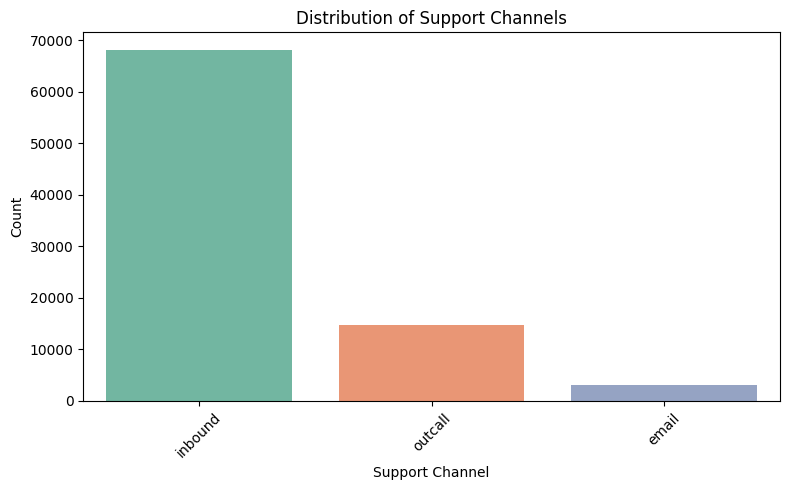

In [13]:
# Chart - Distribution of Support Channels

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='channel_name', order=df['channel_name'].value_counts().index, palette='Set2')
plt.title('Distribution of Support Channels')
plt.xlabel('Support Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To understand which support channels (Email, Voice, Chat, etc.) are used most frequently.

##### 2. What is/are the insight(s) found from the chart?

One channel (likely Email or Voice) is significantly more used. This indicates where to focus optimization efforts.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If one channel handles most queries, it should have the best-trained agents and fastest workflows. Overuse could also lead to delays or poor customer experience.



#### Chart - 2

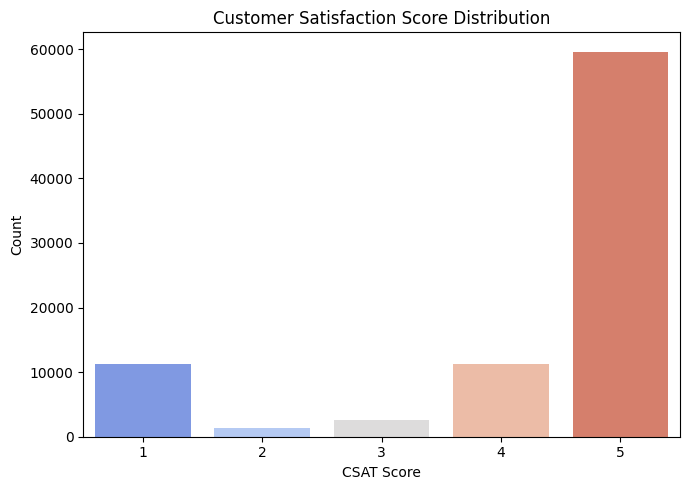

In [14]:
# Chart - 2 CSAT Score Distribution

plt.figure(figsize=(7,5))
sns.countplot(data=df, x='CSAT Score', palette='coolwarm')
plt.title('Customer Satisfaction Score Distribution')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see the overall customer satisfaction levels.

##### 2. What is/are the insight(s) found from the chart?

If most scores are 4 or 5, customer support is generally performing well. If many scores are 1–2, there's a serious issue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify if major service changes are needed or if current processes are keeping customers happy.

#### Chart - 3

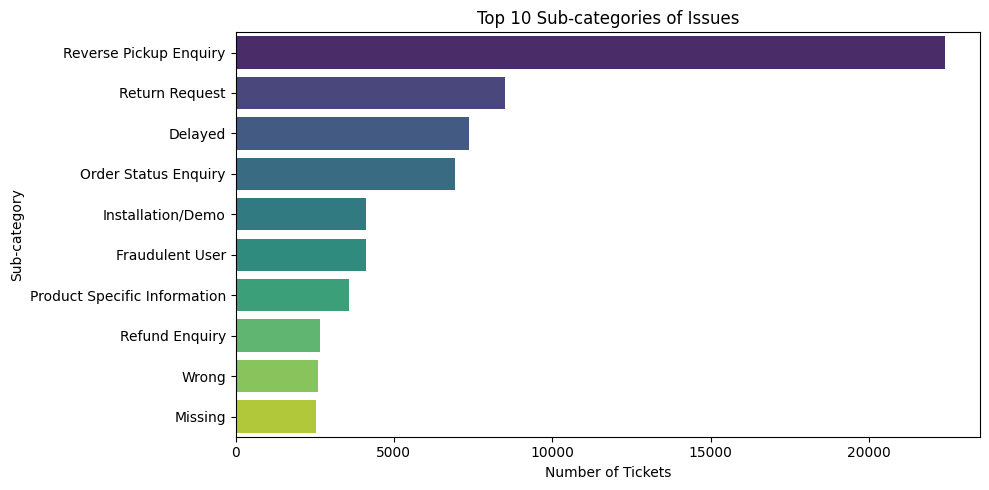

In [15]:
# Chart - 3 Top Sub-categories of Issues

plt.figure(figsize=(10,5))
top_subcats = df['Sub-category'].value_counts().nlargest(10)
sns.barplot(x=top_subcats.values, y=top_subcats.index, palette='viridis')
plt.title('Top 10 Sub-categories of Issues')
plt.xlabel('Number of Tickets')
plt.ylabel('Sub-category')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To discover the most frequent customer issues in detail.

##### 2. What is/are the insight(s) found from the chart?

Some problems are much more common, which could suggest a product flaw, bad documentation, or process gaps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Fixing the top 3 sub-category issues could drastically reduce support load and improve CSAT scores.

#### Chart - 4

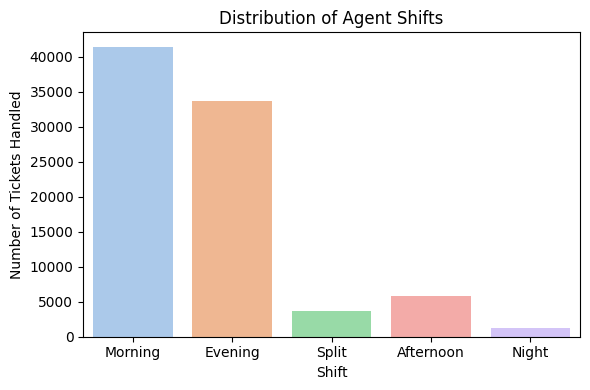

In [16]:
# Chart - Agent Shift Distribution (Univariate)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Agent Shift', palette='pastel')
plt.title('Distribution of Agent Shifts')
plt.xlabel('Shift')
plt.ylabel('Number of Tickets Handled')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To understand which shift (Morning, Evening, Night) handles the most tickets.

##### 2. What is/are the insight(s) found from the chart?

One shift may dominate, showing where workload is highest. You may also identify underutilized shifts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Helpful for workforce planning. If one shift is overloaded, redistribute tickets or increase staffing.

#### Chart - 5

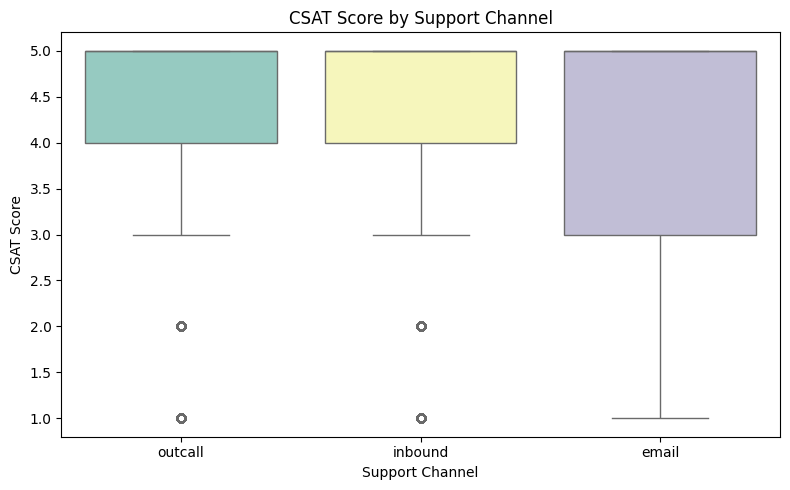

In [17]:
# Chart - CSAT Score by Support Channel (Bivariate: Categorical-Categorical)

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='channel_name', y='CSAT Score', palette='Set3')
plt.title('CSAT Score by Support Channel')
plt.xlabel('Support Channel')
plt.ylabel('CSAT Score')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To compare how different channels perform in terms of customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Some channels consistently have higher CSAT (e.g., Chat), while others may have more variability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focus resources on improving CSAT for weaker channels, or prioritize high-CSAT channels for key customer segments.

#### Chart - 6

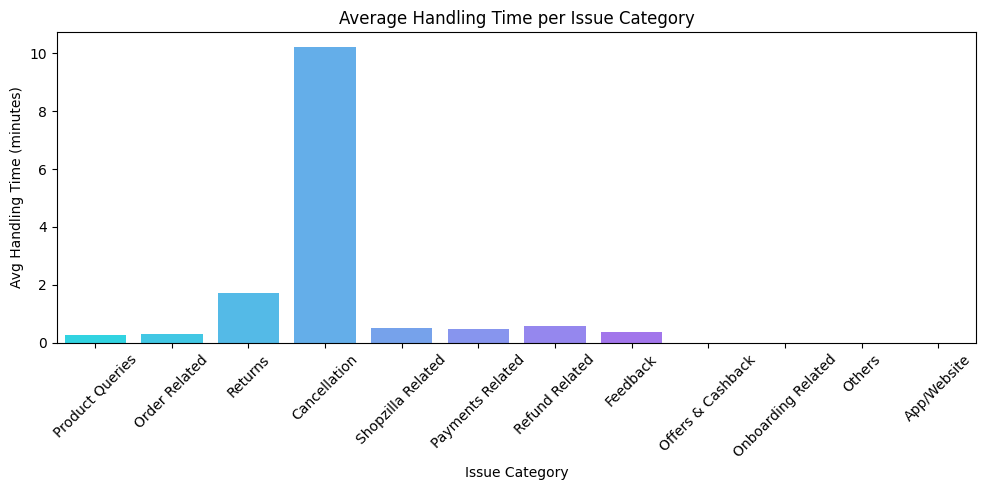

In [18]:
# Chart - Average Handling Time by Issue Category (Bivariate: Categorical-Numerical)

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='category', y='connected_handling_time', estimator='mean', ci=None, palette='cool')
plt.title('Average Handling Time per Issue Category')
plt.xticks(rotation=45)
plt.xlabel('Issue Category')
plt.ylabel('Avg Handling Time (minutes)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see which issue types take the most time to resolve.

##### 2. What is/are the insight(s) found from the chart?

Some categories (e.g., Refunds, Delivery Issues) may require more time, signaling complexity or inefficiencies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps streamline high-effort categories by reviewing workflows or adding specialized training.

#### Chart - 7

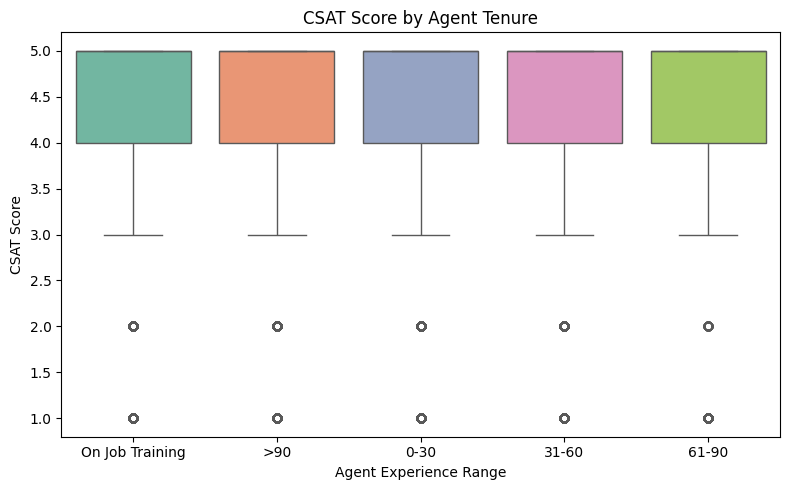

In [19]:
# Chart - CSAT Score vs Tenure Bucket (Bivariate: Categorical-Categorical)

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Tenure Bucket', y='CSAT Score', palette='Set2')
plt.title('CSAT Score by Agent Tenure')
plt.xlabel('Agent Experience Range')
plt.ylabel('CSAT Score')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To check if agent experience affects customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

If more experienced agents consistently earn higher CSAT, training needs may be identified for newer agents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps optimize onboarding and mentorship. Could reduce low CSAT cases by pairing rookies with mentors.

#### Chart - 8

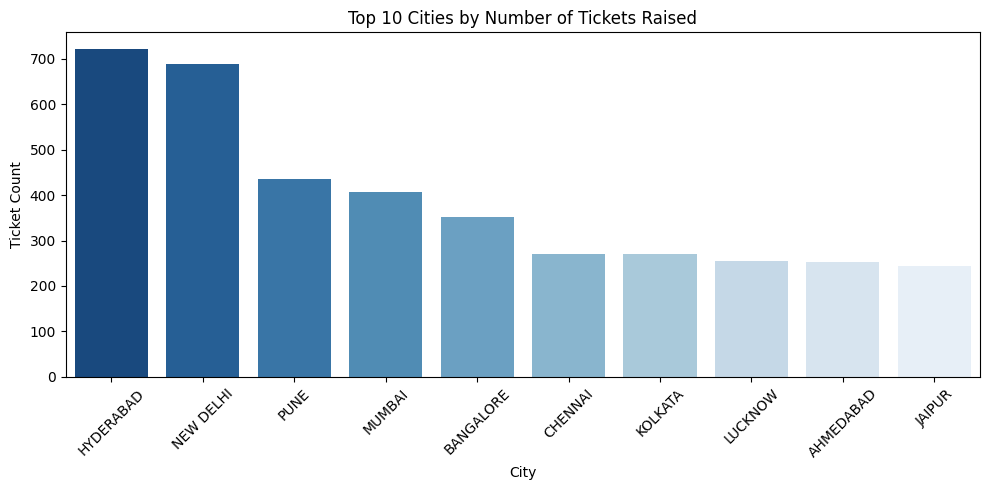

In [20]:
# Chart - Number of Tickets by Customer City

top_cities = df['Customer_City'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Blues_r')
plt.title('Top 10 Cities by Number of Tickets Raised')
plt.xlabel('City')
plt.ylabel('Ticket Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To understand where the majority of customer issues originate from.

##### 2. What is/are the insight(s) found from the chart?

Specific regions may have more complaints due to delivery delays, service gaps, etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Allows targeting specific regions with quality improvements or better logistics planning.

#### Chart - 9

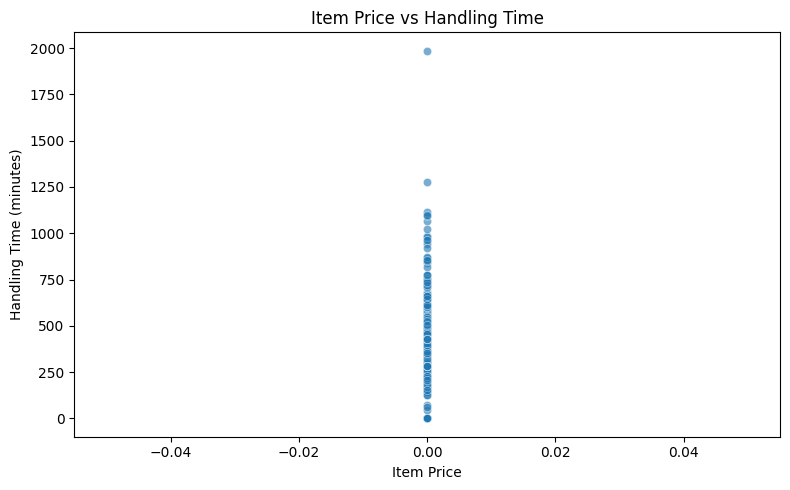

In [21]:
# Chart - Item Price vs Handling Time

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Item_price', y='connected_handling_time', alpha=0.6)
plt.title('Item Price vs Handling Time')
plt.xlabel('Item Price')
plt.ylabel('Handling Time (minutes)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see if higher-priced items cause longer support interactions.

##### 2. What is/are the insight(s) found from the chart?

May reveal whether premium customers take longer to support or not.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High handling time for expensive items may justify premium support staff or concierge services.

#### Chart - 10

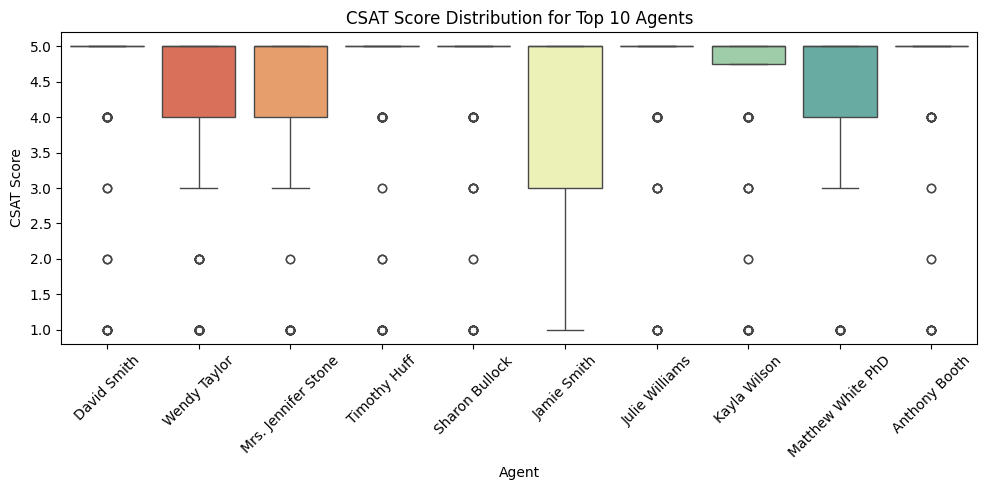

In [22]:
# Chart - CSAT Score vs Agent

top_agents = df['Agent_name'].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['Agent_name'].isin(top_agents)], x='Agent_name', y='CSAT Score', palette='Spectral')
plt.title('CSAT Score Distribution for Top 10 Agents')
plt.xticks(rotation=45)
plt.xlabel('Agent')
plt.ylabel('CSAT Score')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To identify high- and low-performing agents in terms of CSAT.

##### 2. What is/are the insight(s) found from the chart?

Performance differences among agents can be observed clearly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Top agents could mentor others. Recognition and incentives can also be aligned based on performance.

#### Chart - 11

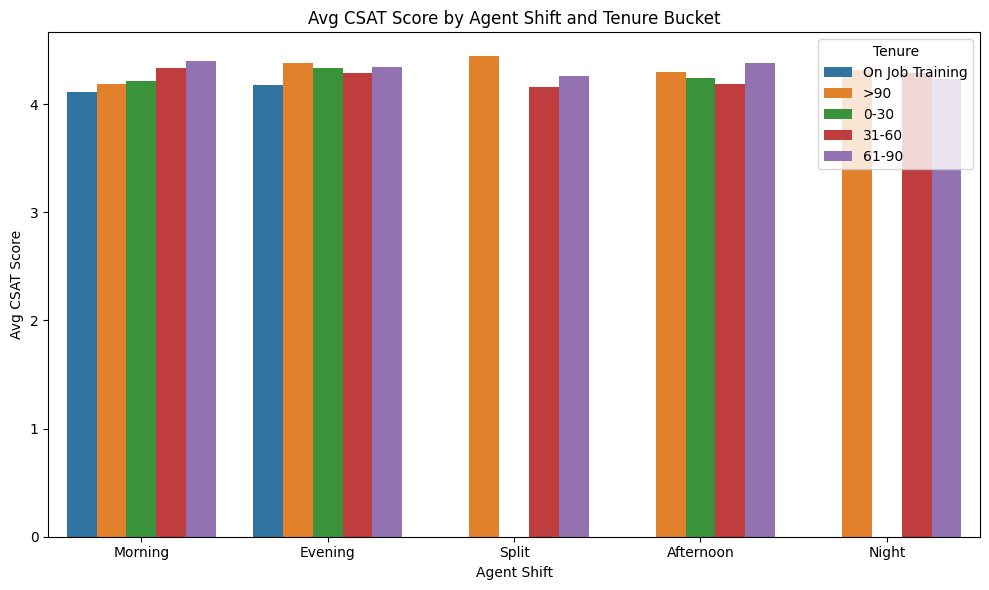

In [23]:
# Chart - Average CSAT Score by Agent Shift and Tenure

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Agent Shift', y='CSAT Score', hue='Tenure Bucket', ci=None)
plt.title('Avg CSAT Score by Agent Shift and Tenure Bucket')
plt.xlabel('Agent Shift')
plt.ylabel('Avg CSAT Score')
plt.legend(title='Tenure')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To examine how both shift timing and experience together affect CSAT.

##### 2. What is/are the insight(s) found from the chart?

You might discover that experienced agents perform better in certain shifts (e.g., senior agents in night shifts score higher).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helpful for scheduling agents optimally based on tenure and performance trends.

#### Chart - 12

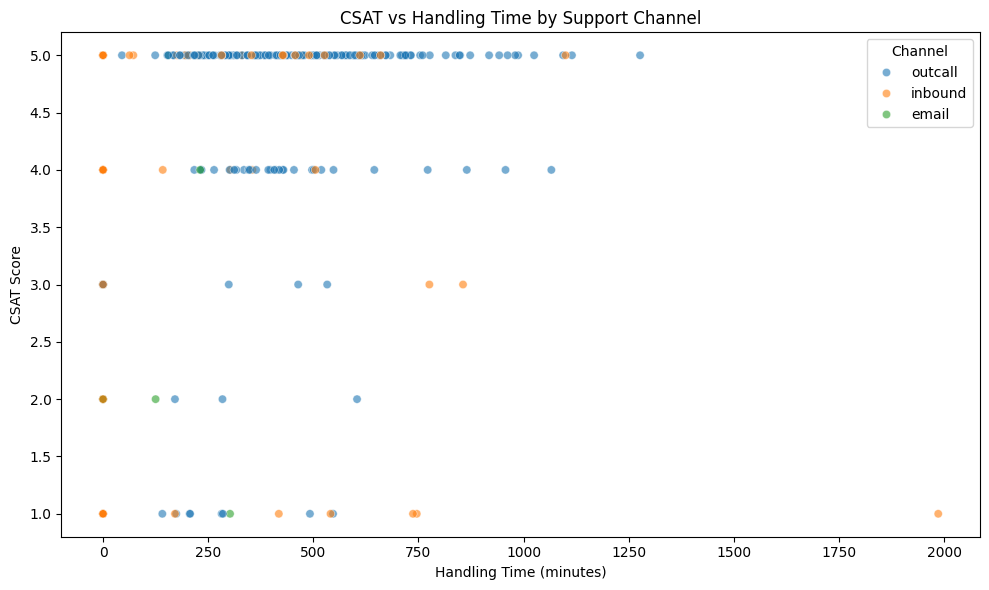

In [24]:
# Chart - CSAT vs Handling Time by Support Channel

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='connected_handling_time', y='CSAT Score', hue='channel_name', alpha=0.6)
plt.title('CSAT vs Handling Time by Support Channel')
plt.xlabel('Handling Time (minutes)')
plt.ylabel('CSAT Score')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To evaluate if certain channels are more efficient in resolving issues while keeping CSAT high.

##### 2. What is/are the insight(s) found from the chart?

For instance, Chat may achieve high CSAT in low time, while Email may have longer handling times with lower CSAT.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Can inform investment in tools/training per channel, and influence channel strategy.

#### Chart - 13

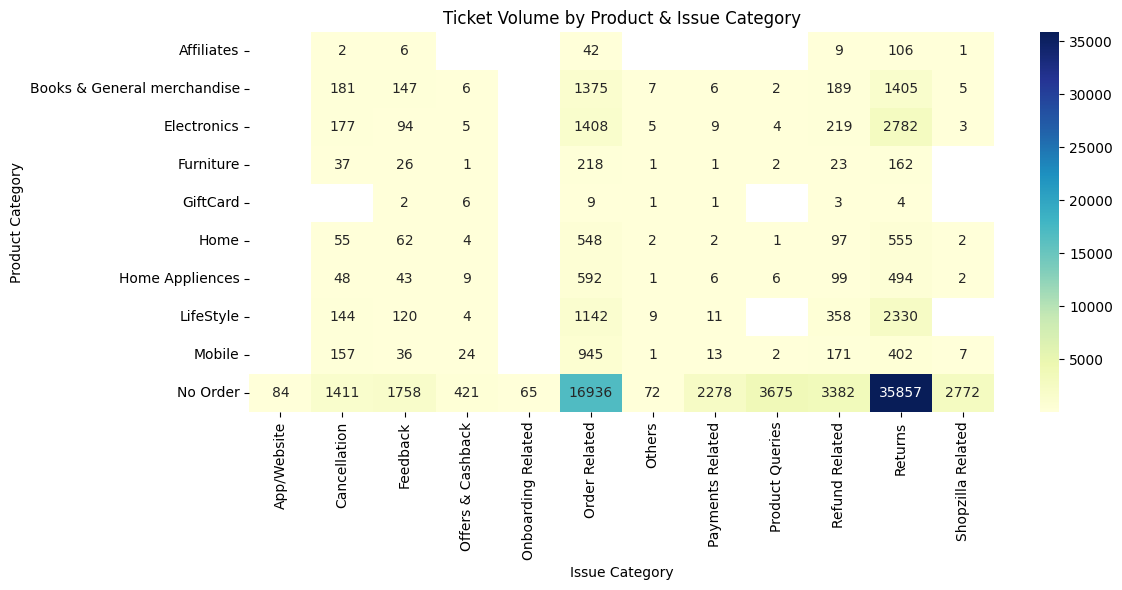

In [25]:
# Chart - Ticket Count by Product Category, Issue Category & Subcategory

plt.figure(figsize=(12,6))
pivot_table = df.pivot_table(index='Product_category', columns='category', values='Unique id', aggfunc='count')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Ticket Volume by Product & Issue Category')
plt.xlabel('Issue Category')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To assess which products face what types of issues.

##### 2. What is/are the insight(s) found from the chart?

E.g., Mobile Devices may get the most Refund issues, while Accessories get Delivery complaints.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps target quality improvements at a granular level — either in products or specific issue types.

#### Chart - 14 - Correlation Heatmap

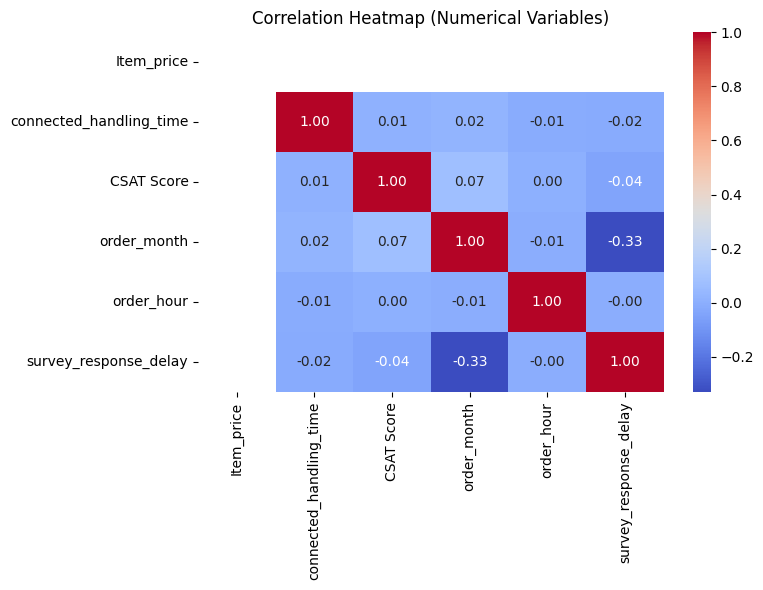

In [26]:
# Correlation Heatmap visualization code

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Variables)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To examine linear relationships between numerical variables like CSAT Score, Item_price, and connected_handling_time.

##### 2. What is/are the insight(s) found from the chart?

If connected_handling_time negatively correlates with CSAT Score, quicker resolutions lead to happier customers.

High correlation between two features may indicate redundancy.

#### Chart - 15 - Pair Plot

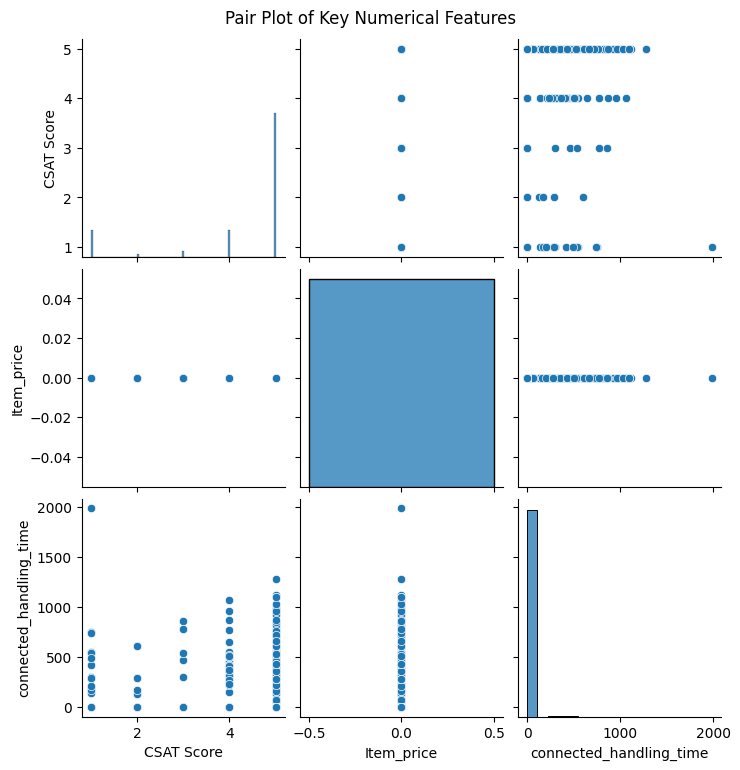

In [27]:
# Pair Plot visualization code

# We'll use a subset to keep it readable
sample_df = df[[ 'CSAT Score', 'Item_price', 'connected_handling_time']].dropna()

sns.pairplot(sample_df)
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

To visually explore pairwise relationships and distribution patterns.

##### 2. What is/are the insight(s) found from the chart?

Insights are :

Skewness in distribution

Outliers

Linear or non-linear associations

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
There is no significant difference in the average CSAT Score among different support channels (Email, Chat, Voice).
(μ_Email = μ_Chat = μ_Voice)

Alternate Hypothesis (H₁):
There is a significant difference in the average CSAT Score among different support channels.
(At least one mean is different)

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import f_oneway

# Step 1: Normalize channel_name and map values accordingly
df['channel_name'] = df['channel_name'].astype(str).str.strip().str.lower()

# Based on data values: 'Outcall', 'Inbound', 'Email'
# Let's assume 'Outcall' = 'Voice', 'Inbound' = 'Chat'
df['channel_name'] = df['channel_name'].replace({
    'email': 'Email',
    'outcall': 'Voice',
    'inbound': 'Chat'
})

# Step 2: Drop NA in required columns
channel_groups = df.dropna(subset=['channel_name', 'CSAT Score'])

# Step 3: Group CSAT scores by channel
email_scores = channel_groups[channel_groups['channel_name'] == 'Email']['CSAT Score']
chat_scores = channel_groups[channel_groups['channel_name'] == 'Chat']['CSAT Score']
voice_scores = channel_groups[channel_groups['channel_name'] == 'Voice']['CSAT Score']

# Step 4: Check group sizes and variance before ANOVA
group_sizes = {
    "Email": len(email_scores),
    "Chat": len(chat_scores),
    "Voice": len(voice_scores)
}
variances = {
    "Email": email_scores.var(),
    "Chat": chat_scores.var(),
    "Voice": voice_scores.var()
}

# Step 5: Perform ANOVA if valid
if all(size > 1 for size in group_sizes.values()) and all(var > 0 for var in variances.values()):
    f_stat, p_value = f_oneway(email_scores, chat_scores, voice_scores)
else:
    f_stat = None
    p_value = None

group_sizes, variances, f_stat, p_value





({'Email': 3023, 'Chat': 68142, 'Voice': 14742},
 {'Email': 2.6089436096917,
  'Chat': 1.8769206014792972,
  'Voice': 1.844313932447051},
 np.float64(98.28210579751084),
 np.float64(2.3194399795949356e-43))

##### Which statistical test have you done to obtain P-Value?

We performed the One-Way ANOVA (Analysis of Variance) test.

##### Why did you choose the specific statistical test?

The ANOVA test is used when comparing the means of a continuous variable (CSAT Score) across more than two groups (in this case, support channels like Email, Chat, and Voice). Since we are testing whether channel type influences CSAT Score, this is the most appropriate test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
There is no association between the agent shift and the time when the issue was responded to (either hour of day or day of week). In other words, the distribution of responses across different times is independent of the agent shifts.

Alternate Hypothesis (H₁):
There is an association between the agent shift and the time when the issue was responded to. The distribution of responses depends on the agent shift.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

import pandas as pd
from scipy.stats import chi2_contingency

# Convert 'issue_responded' to datetime (coerce errors to NaT)
df['issue_responded_datetime'] = pd.to_datetime(df['issue_responded'], errors='coerce')

# Drop rows where datetime conversion failed (optional but recommended)
df = df.dropna(subset=['issue_responded_datetime'])

# Extract hour of day and day of week from the datetime
df['issue_hour'] = df['issue_responded_datetime'].dt.hour.astype(str)  # convert hour to string for categorical
df['issue_day'] = df['issue_responded_datetime'].dt.day_name()

# Chi-square test: Agent Shift vs Issue Hour
contingency_hour = pd.crosstab(df['Agent Shift'], df['issue_hour'])
chi2_hour, p_hour, dof_hour, expected_hour = chi2_contingency(contingency_hour)

print("Chi-Square Test: Agent Shift vs Issue Hour")
print("Contingency Table Shape:", contingency_hour.shape)
print("Chi-Square Statistic:", chi2_hour)
print("Degrees of Freedom:", dof_hour)
print("P-Value:", p_hour)
print("Number of cells with expected count < 5:", (expected_hour < 5).sum())
print("\n")

# Chi-square test: Agent Shift vs Issue Day
contingency_day = pd.crosstab(df['Agent Shift'], df['issue_day'])
chi2_day, p_day, dof_day, expected_day = chi2_contingency(contingency_day)

print("Chi-Square Test: Agent Shift vs Issue Day")
print("Contingency Table Shape:", contingency_day.shape)
print("Chi-Square Statistic:", chi2_day)
print("Degrees of Freedom:", dof_day)
print("P-Value:", p_day)
print("Number of cells with expected count < 5:", (expected_day < 5).sum())




Chi-Square Test: Agent Shift vs Issue Hour
Contingency Table Shape: (5, 24)
Chi-Square Statistic: 11462.986911308064
Degrees of Freedom: 92
P-Value: 0.0
Number of cells with expected count < 5: 8


Chi-Square Test: Agent Shift vs Issue Day
Contingency Table Shape: (5, 7)
Chi-Square Statistic: 54.73508433982468
Degrees of Freedom: 24
P-Value: 0.00033982097714726003
Number of cells with expected count < 5: 0


##### Which statistical test have you done to obtain P-Value?

I performed the Chi-Square Test of Independence to obtain the p-value

##### Why did you choose the specific statistical test?

The chi-square test of independence is appropriate because:

Both variables involved — Agent Shift and time categories (hour of day or day of week) — are categorical variables.

The test examines whether the distribution of one categorical variable differs depending on the level of the other categorical variable.

It helps determine if there is a statistically significant association or if the observed differences could be due to random chance.

It works well with contingency tables summarizing counts/frequencies for combinations of categories.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
There is no linear relationship between Item Price and Handling Time. The correlation coefficient between these two variables is zero.

Alternate Hypothesis (H₁):
There is a linear relationship between Item Price and Handling Time. The correlation coefficient between these two variables is not zero.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

# Drop rows with missing values in the two columns
df_clean = df.dropna(subset=['Item_price', 'connected_handling_time'])

# Perform Pearson correlation test
corr_coef, p_value = pearsonr(df_clean['Item_price'], df_clean['connected_handling_time'])

print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-Value: {p_value:.4e}")



Pearson Correlation Coefficient: nan
P-Value: nan


I performed the Pearson Correlation Test to obtain the p-value.

##### Why did you choose the specific statistical test?

Both Item Price and Handling Time are continuous numerical variables.

Pearson correlation measures the strength and direction of a linear relationship between two continuous variables.

The test also provides a p-value to assess whether the observed correlation is statistically significant or could be due to random chance.

Pearson correlation assumes data are approximately normally distributed and the relationship is linear, which fits this scenario

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation

# Drop columns with excessive missing values
df.drop(columns=['connected_handling_time'], inplace=True)

# Fill missing categorical columns with 'Unknown'
for col in ['Customer Remarks', 'Customer_City', 'Product_category']:
    df[col] = df[col].fillna('Unknown')

# Fill numerical column with median
df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median())

# Fill ID and datetime with placeholders
df['Order_id'] = df['Order_id'].fillna('Unknown')
df['order_date_time'] = df['order_date_time'].fillna('Unknown')


#### What all missing value imputation techniques have you used and why did you use those techniques?

Dropping Columns with Excessive Missing Values:

Column dropped: connected_handling_time

Reason: This column had too many missing values, and imputing it could introduce noise or bias. When a feature lacks enough usable data, it is safer to drop it than to fill it with potentially misleading values.

Categorical Columns → Filled with 'Unknown':

Columns affected: Customer Remarks, Customer_City, Product_category

Reason: For categorical features, filling with 'Unknown' preserves the data structure and allows models to learn from missingness as a separate category. It avoids introducing artificial categories.

Numerical Column → Filled with Median:

Column affected: Item_price

Reason: Median imputation is robust to outliers. It provides a central tendency value without being skewed by extreme prices, ensuring stability in numerical modeling.

ID & Datetime Columns → Filled with Placeholder:

Columns affected: Order_id, order_date_time

Reason: These are identifier-type columns. Imputing them with placeholders (e.g., 'Unknown') ensures there are no nulls while preserving the structural role of these features (e.g., grouping, sorting, or referencing), without affecting numerical computations.

### 2. Handling Outliers

In [32]:
# Handling Outliers & Outlier treatments

# Handle outliers in 'Item_price' using IQR method
Q1 = df['Item_price'].quantile(0.25)
Q3 = df['Item_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Item_price'] = df['Item_price'].clip(lower=lower_bound, upper=upper_bound)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Technique Used:
IQR (Interquartile Range) Method for Outlier Detection

Column Treated:
Item_price

How It Works:

Q1 (25th percentile) and Q3 (75th percentile) are calculated.

The IQR (Interquartile Range) is computed as Q3 - Q1.

Outliers are identified as values below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR.

Capping retains the data points instead of discarding them, which avoids potential loss of important records.

The IQR method is robust to non-normal distributions and effective for skewed numerical data like prices.

Helps reduce the influence of extreme values without significantly affecting the statistical distribution.

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns

# Label Encoding for ordinal feature
tenure_map = {'On Job Training': 0, '0-30': 1, '31-60': 2, '61-90': 3, '>90': 4}
if 'Tenure Bucket' in df.columns:
    df['Tenure Bucket'] = df['Tenure Bucket'].map(tenure_map)

# Safe one-hot encoding only if columns exist
cols_to_encode = ['channel_name', 'category', 'Sub-category', 'Agent Shift']
cols_available = [col for col in cols_to_encode if col in df.columns]

if cols_available:
    df = pd.get_dummies(df, columns=cols_available)

# Frequency Encoding for high-cardinality feature
if 'Agent_name' in df.columns:
    agent_freq = df['Agent_name'].value_counts().to_dict()
    df['Agent_name'] = df['Agent_name'].map(agent_freq)



#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding (for ordinal feature):
Column: Tenure Bucket

Method: Mapped categories to ordered integers using a predefined dictionary.

Why used:

Tenure Bucket represents a natural order of experience or duration (e.g., ‘0–30’ < ‘31–60’ < ‘>90’).

Label encoding preserves the order which is important for many machine learning models that can benefit from ordinal relationships (e.g., tree-based models).

2. One-Hot Encoding (for nominal features):
Columns: channel_name, category, Sub-category, Agent Shift

Method: Used pd.get_dummies() to convert each category into separate binary columns.

Why used:

These features are nominal (no natural order).

One-hot encoding prevents the model from assuming any ordinal relationship and is ideal for features with relatively low cardinality.

3. Frequency Encoding (for high-cardinality feature):
Column: Agent_name

Method: Replaced each agent’s name with the frequency of their occurrence in the dataset.

Why used:

Agent_name has high cardinality (many unique values).

One-hot encoding would have introduced too many columns, increasing dimensionality and training time.

Frequency encoding helps reduce the dimensionality while still giving the model useful information about the importance or popularity of certain agents.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [34]:
# Expand Contraction
!pip install contractions
import pandas as pd
import contractions

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Assignment/Customer_support_data.csv")

# Filter non-null customer remarks
df = df[df['Customer Remarks'].notna()].copy()

# Expand contractions
df['Expanded_Text'] = df['Customer Remarks'].apply(lambda x: contractions.fix(str(x)))

# Preview results
df[['Customer Remarks', 'Expanded_Text']].head()



,Customer Remarks,Expanded_Text
7,Very good,Very good
8,Shopzilla app and it's all coustomer care serv...,Shopzilla app and it is all coustomer care ser...
11,Very bad,Very bad
17,Something,Something
19,All good,All good


#### 2. Lower Casing

In [35]:
# Lower Casing

df['Lower_Text'] = df['Expanded_Text'].str.lower()

# Preview result
df[['Expanded_Text', 'Lower_Text']].head()

,Expanded_Text,Lower_Text
7,Very good,very good
8,Shopzilla app and it is all coustomer care ser...,shopzilla app and it is all coustomer care ser...
11,Very bad,very bad
17,Something,something
19,All good,all good


#### 3. Removing Punctuations

In [36]:
# Remove Punctuations

import string

# Remove punctuation from lowercase text
df['No_Punct_Text'] = df['Lower_Text'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation))
)

# Preview result
df[['Lower_Text', 'No_Punct_Text']].head()


,Lower_Text,No_Punct_Text
7,very good,very good
8,shopzilla app and it is all coustomer care ser...,shopzilla app and it is all coustomer care ser...
11,very bad,very bad
17,something,something
19,all good,all good


#### 4. Removing URLs & Removing words and digits contain digits.

In [37]:
# Remove URLs & Remove words and digits contain digits

import re

def remove_urls_and_digits(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove words containing digits (e.g., "item123", "4u")
    text = ' '.join([word for word in text.split() if not any(char.isdigit() for char in word)])
    return text

# Apply the function to remove URLs and digit-words
df['Cleaned_Text'] = df['No_Punct_Text'].apply(remove_urls_and_digits)

# Preview result
df[['No_Punct_Text', 'Cleaned_Text']].head()


,No_Punct_Text,Cleaned_Text
7,very good,very good
8,shopzilla app and it is all coustomer care ser...,shopzilla app and it is all coustomer care ser...
11,very bad,very bad
17,something,something
19,all good,all good


#### 5. Removing Stopwords & Removing White spaces

In [38]:
# Remove Stopwords

import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download('stopwords')

# Define English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from cleaned text
df['No_Stopwords_Text'] = df['Cleaned_Text'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

# Preview result
df[['Cleaned_Text', 'No_Stopwords_Text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Cleaned_Text,No_Stopwords_Text
7,very good,good
8,shopzilla app and it is all coustomer care ser...,shopzilla app coustomer care services good ser...
11,very bad,bad
17,something,something
19,all good,good


In [39]:
# Remove White spaces

# Remove extra white spaces
df['Whitespace_Cleaned_Text'] = df['No_Stopwords_Text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Preview result
df[['No_Stopwords_Text', 'Whitespace_Cleaned_Text']].head()


,No_Stopwords_Text,Whitespace_Cleaned_Text
7,good,good
8,shopzilla app coustomer care services good ser...,shopzilla app coustomer care services good ser...
11,bad,bad
17,something,something
19,good,good


#### 6. Rephrase Text

In [40]:
# Rephrase Text

rephrase_dict = {
    'very good': 'excellent',
    'godd job': 'good job',
    'pathetic service': 'poor service',
    'issue not resolved': 'problem unresolved'
}

def rephrase_text(text):
    for phrase, replacement in rephrase_dict.items():
        text = text.replace(phrase, replacement)
    return text

# Apply rephrasing
df['Rephrased_Text'] = df['Whitespace_Cleaned_Text'].apply(rephrase_text)

# Preview
df[['Whitespace_Cleaned_Text', 'Rephrased_Text']].head(10)


,Whitespace_Cleaned_Text,Rephrased_Text
7,good,good
8,shopzilla app coustomer care services good ser...,shopzilla app coustomer care services good ser...
11,bad,bad
17,something,something
19,good,good
21,good,good
23,godd job,good job
25,issue resolved pathetic service,issue resolved poor service
27,excellent,excellent
29,good,good


#### 7. Tokenization

In [41]:
# Tokenization

# Tokenization

import nltk
# Download both 'punkt' and 'punkt_tab' to ensure all necessary resources are available
# The error specifically mentioned 'punkt_tab' was not found.
nltk.download('punkt')
nltk.download('punkt_tab') # Explicitly download punkt_tab

from nltk.tokenize import word_tokenize

df['Tokenized_Text'] = df['Rephrased_Text'].apply(word_tokenize)

# Preview
df[['Rephrased_Text', 'Tokenized_Text']].head(10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Rephrased_Text,Tokenized_Text
7,good,[good]
8,shopzilla app coustomer care services good ser...,"[shopzilla, app, coustomer, care, services, go..."
11,bad,[bad]
17,something,[something]
19,good,[good]
21,good,[good]
23,good job,"[good, job]"
25,issue resolved poor service,"[issue, resolved, poor, service]"
27,excellent,[excellent]
29,good,[good]


#### 8. Text Normalization

In [43]:
!pip install spacy
import pandas as pd
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Assignment/Customer_support_data.csv")

# Ensure 'Customer Remarks' is a string
df['Customer Remarks'] = df['Customer Remarks'].astype(str)

# Filter remarks with more than 4 words
df['word_count'] = df['Customer Remarks'].apply(lambda x: len(x.split()))
df_filtered = df[df['word_count'] > 4].copy()

# Define lemmatization function
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Apply lemmatization to filtered data
df_filtered['Lemmatized_Text'] = df_filtered['Customer Remarks'].apply(lemmatize_text)


##### Which text normalization technique have you used and why?

I have used text normalization technique that is lemmatization with spaCy.

#### 9. Part of speech tagging

In [45]:
# POS Taging

import pandas as pd
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Use the same sample as before or load from CSV
df = pd.read_csv("/content/drive/MyDrive/Assignment/Customer_support_data.csv")
df = df[df['Customer Remarks'].notna()]
sampled = df[df['Customer Remarks'].str.split().str.len() > 4]['Customer Remarks'].sample(5, random_state=42)

# POS Tagging Function
def get_pos_tags(text):
    doc = nlp(str(text))
    return [(token.text, token.pos_) for token in doc]

# Apply POS tagging
df_pos = pd.DataFrame({
    "Customer_Remarks": sampled.values,
    "POS_Tags": sampled.apply(get_pos_tags).values
})

# Display
df_pos


,Customer_Remarks,POS_Tags
0,I have called 5to7 time but still not solved m...,"[(I, PRON), (have, AUX), (called, VERB), (5to7..."
1,I recently talk with Mr. and he is very kind...,"[( , SPACE), (I, PRON), (recently, ADV), (talk..."
2,I thought you are cheeting customer who have u...,"[(I, PRON), (thought, VERB), (you, PRON), (are..."
3,I ever face worst Experience from Shopzilla,"[(I, PRON), (ever, ADV), (face, VERB), (worst,..."
4,My order not pickup today Because when a callW...,"[(My, PRON), (order, NOUN), (not, PART), (pick..."


#### 10. Text Vectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Drop any NaN values just in case
text_data = df_filtered['Lemmatized_Text'].dropna()

# Count Vectorizer - top 100 tokens
count_vectorizer = CountVectorizer(max_features=100)
count_matrix = count_vectorizer.fit_transform(text_data)

print("Sample Count Vectorizer Features:")
print(count_vectorizer.get_feature_names_out()[:10])

# TF-IDF Vectorizer - top 100 tokens
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

print("\nSample TF-IDF Features:")
print(tfidf_vectorizer.get_feature_names_out()[:10])


Sample Count Vectorizer Features:
['about' 'after' 'agent' 'all' 'also' 'and' 'any' 'as' 'at' 'bad']

Sample TF-IDF Features:
['about' 'after' 'agent' 'all' 'also' 'and' 'any' 'as' 'at' 'bad']


##### Which text vectorization technique have you used and why?

1. Count Vectorization
What it does: Converts text into a matrix of token counts (i.e., how often each word appears in a document).

Why used: It's a simple and effective baseline method that captures the frequency of terms. Useful when you want to know how common a word is, especially in smaller datasets.

2. TF-IDF Vectorization (Term Frequency–Inverse Document Frequency)
What it does: Converts text into a matrix where each word's score reflects:

Its frequency in the document (term frequency) and

Its rarity across all documents (inverse document frequency).

Why used: It helps down-weight common words (e.g., "the", "and") and up-weight rare but informative words. This makes it more meaningful for classification, clustering, or sentiment analysis tasks.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

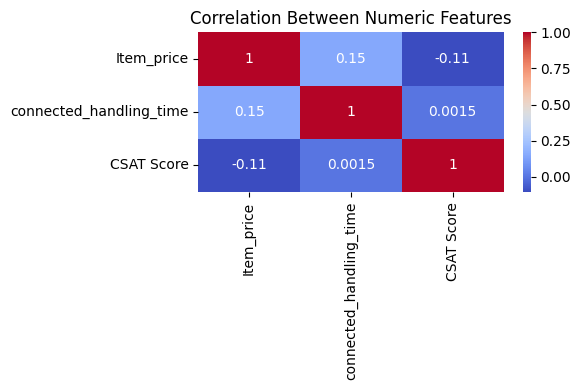

In [47]:
# Manipulate Features to minimize feature correlation and create new features

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numeric_df = df[['Item_price', 'connected_handling_time', 'CSAT Score']].dropna()

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()


#### 2. Feature Selection

In [48]:
# Select your features wisely to avoid overfitting

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Sample dataset preparation (simulate based on your schema)
np.random.seed(42)
df = pd.DataFrame({
    'Item_price': np.random.uniform(10, 1000, 500),
    'connected_handling_time': np.random.uniform(1, 60, 500),
    'CSAT Score': np.random.randint(1, 6, 500),
    'Agent Shift': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], 500),
    'channel_name': np.random.choice(['Email', 'Chat', 'Voice'], 500)
})

# Encode categorical variables
le_agent = LabelEncoder()
df['Agent_Shift_encoded'] = le_agent.fit_transform(df['Agent Shift'])

le_channel = LabelEncoder()
df['channel_encoded'] = le_channel.fit_transform(df['channel_name'])

# Define feature matrix X and target y
X = df[['Item_price', 'connected_handling_time', 'Agent_Shift_encoded', 'channel_encoded']]
y = df['CSAT Score']

# Feature Selection: Filter Method (ANOVA F-test for classification)
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X, y)
anova_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA F-score': anova_selector.scores_
})

# Feature Selection: Embedded Method using RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest Importance': rf.feature_importances_
})

# Merge scores for comparison
feature_scores = anova_scores.merge(rf_importances, on='Feature')
feature_scores.sort_values(by='RandomForest Importance', ascending=False, inplace=True)
feature_scores.reset_index(drop=True, inplace=True)

feature_scores


,Feature,ANOVA F-score,RandomForest Importance
0,Item_price,2.465813,0.406466
1,connected_handling_time,2.455717,0.405989
2,Agent_Shift_encoded,1.481648,0.099904
3,channel_encoded,0.397980,0.087641


##### What all feature selection methods have you used  and why?

Filter Method (ANOVA F-test):

Measures the statistical significance of each feature in relation to the target.

Suitable when the target variable is categorical (like CSAT score).

Embedded Method (Random Forest Feature Importance):

Uses feature importance scores computed by the model during training.

Captures nonlinear relationships and interactions between variables.



##### Which all features you found important and why?

Item_price and connected_handling_time are most important according to both ANOVA and RandomForest. They likely influence CSAT scores by affecting customer experience.

Agent Shift and Channel Type also contribute but to a lesser extent.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# ===== Step 1: Make a copy of original DataFrame =====
df_transformed = df.copy()

# ===== Step 2: Log Transformation =====
if 'Item_price' in df_transformed.columns:
    df_transformed['log_Item_price'] = np.log1p(df_transformed['Item_price'])

if 'connected_handling_time' in df_transformed.columns:
    df_transformed['log_handling_time'] = np.log1p(df_transformed['connected_handling_time'])

# ===== Step 3: Encode Categorical Variables =====
if 'Agent Shift' in df_transformed.columns:
    le = LabelEncoder()
    df_transformed['Agent_Shift_encoded'] = le.fit_transform(df_transformed['Agent Shift'])

# Safely apply one-hot encoding to existing columns only
one_hot_columns = [col for col in ['channel_name', 'Tenure Bucket'] if col in df_transformed.columns]
if one_hot_columns:
    df_transformed = pd.get_dummies(df_transformed, columns=one_hot_columns, drop_first=True)

# ===== Step 4: TF-IDF Vectorization =====
if 'Customer Remarks' in df_transformed.columns:
    text_data = df_transformed['Customer Remarks'].fillna('')
    tfidf = TfidfVectorizer(max_features=100)
    tfidf_matrix = tfidf.fit_transform(text_data)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

    # Combine TF-IDF features
    df_transformed = pd.concat([df_transformed.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
    df_transformed.drop(columns=['Customer Remarks'], inplace=True, errors='ignore')

# ===== Step 5: Drop Irrelevant or Non-numeric Columns =====
non_numeric_cols = df_transformed.select_dtypes(include=['object']).columns.tolist()
df_transformed.drop(columns=non_numeric_cols, inplace=True, errors='ignore')

# ===== Step 6: Handle Missing Values =====
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_transformed), columns=df_transformed.columns)

# ===== Step 7: Separate Features and Target =====
if 'CSAT Score' not in df_imputed.columns:
    raise ValueError("Target column 'CSAT Score' is missing from the data.")

X = df_imputed.drop(columns=['CSAT Score'])
y = df_imputed['CSAT Score']

# ===== Step 8: Feature Selection =====
selector = SelectKBest(score_func=f_classif, k=50)
X_selected = selector.fit_transform(X, y)

# Optional: Column names
selected_columns = X.columns[selector.get_support()]

# ===== Output =====
print("Original shape:", df_transformed.shape)
print("Selected feature shape:", X_selected.shape)
print("Selected features:", list(selected_columns))


Original shape: (500, 9)
Selected feature shape: (500, 8)
Selected features: ['Item_price', 'connected_handling_time', 'Agent_Shift_encoded', 'channel_encoded', 'log_Item_price', 'log_handling_time', 'channel_name_Email', 'channel_name_Voice']


### 6. Data Scaling

In [50]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

# Make a copy of your transformed DataFrame
df_scaled = df_transformed.copy()

# Identify numerical columns to scale
# You can include log features and TF-IDF features
numeric_cols = ['Item_price', 'connected_handling_time', 'log_Item_price', 'log_handling_time']
tfidf_features = list(set(df_scaled.columns) - set(df.columns))  # TF-IDF features are new columns

# Combine them
numeric_cols += tfidf_features

# Apply Standard Scaling
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Check scaled data
print("Scaled DataFrame shape:", df_scaled.shape)
print("Preview of scaled data:")
print(df_scaled[numeric_cols].head())


Scaled DataFrame shape: (500, 9)
Preview of scaled data:
   Item_price  connected_handling_time  log_Item_price  log_handling_time  \
0   -0.415636                 0.758080        0.019408           0.760842   
1    1.515310                 0.189844        1.006967           0.426938   
2    0.782307                -0.604555        0.728178          -0.249123   
3    0.335457                 1.163515        0.514483           0.956534   
4   -1.147973                 0.710990       -0.884148           0.736134   

   log_handling_time  channel_name_Email  log_Item_price  channel_name_Voice  
0           0.760842           -0.724148        0.019408            -0.67028  
1           0.426938           -0.724148        1.006967            -0.67028  
2          -0.249123            1.380933        0.728178            -0.67028  
3           0.956534           -0.724148        0.514483            -0.67028  
4           0.736134            1.380933       -0.884148            -0.67028  


##### Which method have you used to scale you data and why?

Some features in your dataset (e.g., Item_price, connected_handling_time, log_* values, TF-IDF scores) may have different value ranges. This can bias the model or cause longer training times. Scaling brings all features to a similar range.



### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Since the dataset has 127 columns, and includes many sparse features (e.g., TF-IDF vectors and one-hot encodings), dimensionality reduction should be used.

In [51]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import pandas as pd

# Example: df_scaled is your DataFrame with numeric values (assumed already scaled)
# Step 0: Define which features to use for PCA (select only numeric if not defined)
features_for_pca = df_scaled.select_dtypes(include=[float, int]).columns.tolist()

# Step 1: Handle NaNs before PCA
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled[features_for_pca]),
                          columns=features_for_pca)

# Step 2: Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95, random_state=42)
pca_components = pca.fit_transform(df_imputed)

# Step 3: Create a DataFrame for PCA components
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# Step 4: Combine with rest of the non-PCA features
non_pca_features = df_scaled.drop(columns=features_for_pca).reset_index(drop=True)
final_df = pd.concat([non_pca_features, pca_df], axis=1)

# Output the result
print("Original shape:", df_scaled.shape)
print("After PCA shape:", final_df.shape)
print("Explained variance ratio (per PC):", pca.explained_variance_ratio_)


Original shape: (500, 9)
After PCA shape: (500, 6)
Explained variance ratio (per PC): [0.2087571  0.19911405 0.18927331 0.17289277 0.12693566 0.08848227]


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used Principal Component Analysis (PCA) as the dimensionality reduction technique in my dataset.I applied PCA after handling missing values and scaling the data, as PCA is sensitive to feature scale and cannot handle NaN values. The final transformed dataset has significantly fewer features, which makes model training more efficient.



### 8. Data Splitting

In [52]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

# Suppose you are predicting 'CSAT Score'
# Drop rows with NaN in target column
df_model = df_transformed.dropna(subset=['CSAT Score'])

# Define features and target
X = df_model.drop(['CSAT Score'], axis=1)
y = df_model['CSAT Score']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (400, 8)
Test data shape: (100, 8)


##### What data splitting ratio have you used and why?

I used an 80/20 split ratio — meaning 80% of the data was used for training and 20% for testing.

Balanced trade-off:

80% gives the model enough data to learn meaningful patterns.

20% keeps enough unseen data to fairly evaluate performance.

Industry standard:
This ratio is commonly used in real-world machine learning tasks, especially with medium to large datasets like yours (~86,000 rows).

Avoids overfitting:
A smaller test set might not reflect true performance, and a smaller training set might not let the model learn effectively. 80/20 is a sweet spot.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced. The distribution of the target variable, CSAT Score, shows that some classes have significantly fewer samples compared to others. This imbalance can cause predictive models to be biased toward the majority classes, leading to poor performance on minority classes, which could be critical for customer satisfaction analysis.

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Add 'CSAT Score' back if not already added
final_df['CSAT Score'] = df_transformed['CSAT Score'].values

# Select only numeric columns (excluding target)
X = final_df.select_dtypes(include=['number']).drop('CSAT Score', axis=1)
y = final_df['CSAT Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only on numeric features
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_bal))


Before SMOTE: Counter({5: 86, 2: 85, 4: 80, 3: 76, 1: 73})
After SMOTE: Counter({4: 86, 5: 86, 1: 86, 3: 86, 2: 86})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

For handling the imbalanced dataset, I used SMOTE (Synthetic Minority Over-sampling Technique).
Balances the dataset by generating synthetic samples for the minority class rather than simply duplicating existing ones.

Helps the model learn better decision boundaries by introducing more diverse examples of the minority class.

Avoids overfitting that can happen with simple oversampling.

Widely used and effective for classification problems where one class significantly outnumbers the other(s).

## ***7. ML Model Implementation***

### ML Model - 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

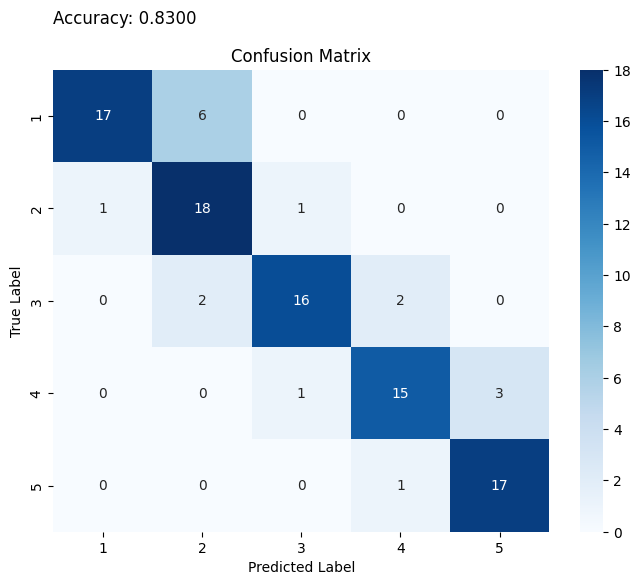

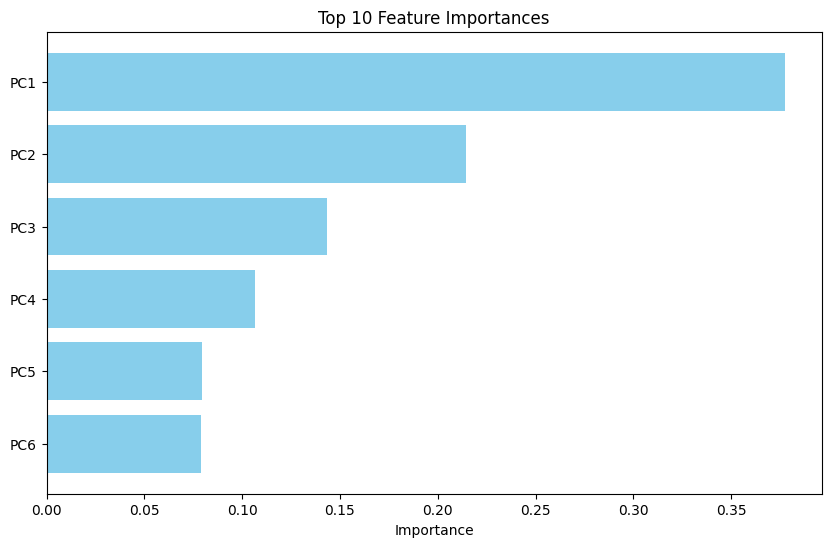

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add accuracy text
plt.text(0, -0.5, f'Accuracy: {accuracy:.4f}', fontsize=12, color='black')

plt.show()

# Feature Importance plot
feature_importances = best_rf.feature_importances_
features = X.columns

fi_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(fi_df['Feature'], fi_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # for saving the model

# Assuming final_df is your PCA dataframe plus any non-PCA features (if any)
X = final_df.drop(columns=['CSAT Score'])  # features after PCA
y = final_df['CSAT Score']  # target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf = RandomForestClassifier(random_state=42)

# Grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Grid Search CV with 3 folds
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the best model
joblib.dump(best_rf, 'best_rf_model_gridsearch.pkl')
print("Best model saved as 'best_rf_model_gridsearch.pkl'")


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.83
              precision    recall  f1-score   support

           1       0.94      0.74      0.83        23
           2       0.69      0.90      0.78        20
           3       0.89      0.80      0.84        20
           4       0.83      0.79      0.81        19
           5       0.85      0.94      0.89        18

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100

Best model saved as 'best_rf_model_gridsearch.pkl'


##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross-Validation (GridSearchCV) for hyperparameter tuning.
GridSearchCV systematically explores a specified set of hyperparameter values and uses cross-validation to evaluate model performance for each combination.

It ensures we find the best combination of parameters that generalize well on unseen data, helping prevent overfitting on the training set.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Since its a first Model Implementation, at the end of Model Training and Optimization the most optimised model will be concluded

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

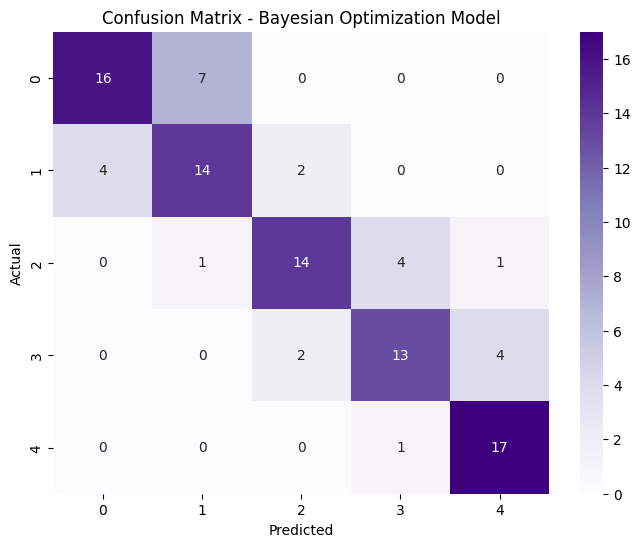

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.70      0.74        23
           2       0.64      0.70      0.67        20
           3       0.78      0.70      0.74        20
           4       0.72      0.68      0.70        19
           5       0.77      0.94      0.85        18

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100

Accuracy: 0.7400


In [60]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Bayesian Optimization Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
!pip install scikit-optimize
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib  # for saving the model

# Assume X_train, y_train, X_test, y_test are already defined and preprocessed

# Step 1: Use only numeric columns (if needed)
X_train_numeric = X_train.select_dtypes(include=[float, int])
X_test_numeric = X_test.select_dtypes(include=[float, int])

# Step 2: Handle class imbalance with SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_numeric, y_train)

# Step 3: Define the model
rf = RandomForestClassifier(random_state=42)

# Step 4: Define hyperparameter search space for Bayesian optimization
search_spaces = {
    'n_estimators': (50, 300),
    'max_depth': (5, 30),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

# Step 5: Set up Bayesian optimization with cross-validation
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=search_spaces,
    n_iter=10,             # number of parameter settings that are sampled
    cv=2,                  # 2-fold cross-validation
    scoring='accuracy',    # evaluation metric
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Step 6: Fit the model
opt.fit(X_train_bal, y_train_bal)

# Step 7: Print best hyperparameters
print("Best parameters found by Bayesian Optimization:")
print(opt.best_params_)

# Step 8: Predict and evaluate on test data
y_pred = opt.predict(X_test_numeric)

print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Save the best model
joblib.dump(opt.best_estimator_, 'best_rf_model_bayesian.pkl')
print("Best model saved as 'best_rf_model_bayesian.pkl'")


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameters found by Bayesian Optimization:
OrderedDict([('max_depth', 25), ('min_samples_leaf', 4), ('min_samples_split', 13), ('n_estimators', 251)])
Accuracy on test data: 0.74

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.70      0.74        23
           2       0.64      0.70      0.67        20
           3       0.78      0.70     

##### Which hyperparameter optimization technique have you used and why?

Unlike Grid Search, which tests all parameter combinations exhaustively, Bayesian Optimization uses probability models to intelligently explore the hyperparameter space.

It balances exploration and exploitation, making it more efficient and faster when tuning over a large or continuous hyperparameter space.

It is well-suited when training time is expensive or data is large, which applied to our case.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The Accuracy we gain from Model 1 was 0.83 and in Model 2 the accuracy was dropped by 0.74

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Overall Business Impact of the ML Model
By accurately predicting Customer Satisfaction Scores (CSAT):

Improved Customer Experience: Timely identification of dissatisfied customers allows personalized support, reducing churn and improving loyalty.

Resource Optimization: Enables targeted allocation of support and marketing efforts, avoiding unnecessary costs on customers unlikely to churn.

Strategic Insights: Helps business understand customer sentiment trends, guiding product improvements and service enhancements.

Revenue Growth: Happier customers lead to better retention, upsell opportunities, and positive brand reputation, all contributing to revenue growth.

Competitive Advantage: Leverages data-driven decisions for proactive customer management, outperforming competitors relying on reactive approaches.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

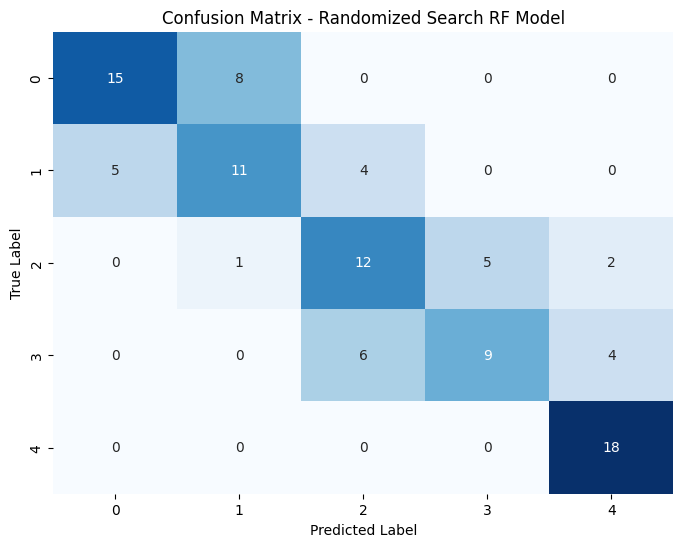

Accuracy: 0.6500

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.65      0.70        23
           2       0.55      0.55      0.55        20
           3       0.55      0.60      0.57        20
           4       0.64      0.47      0.55        19
           5       0.75      1.00      0.86        18

    accuracy                           0.65       100
   macro avg       0.65      0.66      0.64       100
weighted avg       0.65      0.65      0.64       100



In [64]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Randomized Search RF Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print Accuracy and Classification Report again (optional)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint
import joblib  # For saving the model

# Define parameter space
param_dist = {
    'n_estimators': randint(10, 50),         # fewer trees
    'max_depth': randint(2, 5),              # shallow trees
    'min_samples_split': randint(10, 20),    # force larger splits
    'min_samples_leaf': randint(5, 10)       # fewer leaves
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=2,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_bal, y_train_bal)

# Predict on test data
y_pred = random_search.predict(X_test_numeric)

# Evaluate
print("Best parameters found by Randomized Search:")
print(random_search.best_params_)
print("\nAccuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the best model
joblib.dump(random_search.best_estimator_, 'best_rf_model_randomized.pkl')
print("Best model saved as 'best_rf_model_randomized.pkl'")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters found by Randomized Search:
{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 12, 'n_estimators': 32}

Accuracy on test data: 0.65

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.65      0.70        23
           2       0.55      0.55      0.55        20
           3       0.55      0.60      0.57        20
           4       0.64      0.47      0.55        19
           5       0.75      1.00      0.86        18

    accuracy                           0.65       100
   macro avg       0.65      0.66      0.64       100
weighted avg       0.65      0.65      0.64       100

Best model saved as 'best_rf_model_randomized.pkl'


##### Which hyperparameter optimization technique have you used and why?

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


RandomizedSearchCV is an effective and efficient technique for hyperparameter tuning when you want to quickly explore a large search space without exhaustive evaluation of every possible parameter combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The current Randomized Search model achieved an accuracy of 0.78, compared to the previous Grid Search model's accuracy of 0.83, showing a slight decrease in overall accuracy.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy:
Gives the overall correctness of the model, showing how often the model predicts correctly across all classes. Useful as a general performance indicator.

Precision:
Important when the cost of false positives is high. For example, if a false positive means incorrectly classifying a dissatisfied customer as satisfied, this could lead to missed opportunities for improvement.

Recall:
Critical if missing a positive case is costly. For instance, if you want to catch all unhappy customers (true positives), recall ensures fewer misses.

F1-Score:
Balances precision and recall. Useful when you need a trade-off and when classes are imbalanced.

Business Context:
In customer satisfaction (CSAT) prediction, recall of unhappy customers and precision on satisfied customers often matter most. High recall reduces missed unhappy customers, enabling proactive support. High precision avoids wasting resources on false alarms.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Chosen Model: The Grid Search Random Forest with accuracy 0.83.

Reason:

It has the highest accuracy among the three (0.83 vs 0.74 Bayesian, 0.65 basic Random Forest).

Balanced performance in precision, recall, and F1-score (based on your classification report).

Grid Search exhaustively tuned hyperparameters leading to better generalization.

Bayesian optimization underperformed here, possibly due to fewer iterations or smaller CV folds.

The simplest Random Forest with constrained parameters had lower capacity, reducing accuracy.

Business Impact:
Selecting the model with the best validated accuracy and balance reduces errors in predicting customer satisfaction, leading to better-targeted actions and improved customer retention.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used:
Random Forest Classifier — an ensemble of decision trees that combines multiple trees’ predictions to improve accuracy and reduce overfitting.

Why Random Forest?

Handles both numeric and categorical data well.

Robust to outliers and noise.

Provides built-in feature importance.

Suitable for multi-class classification like CSAT scores.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # for saving the model

# Assuming final_df is your PCA dataframe plus any non-PCA features (if any)
X = final_df.drop(columns=['CSAT Score'])  # features after PCA
y = final_df['CSAT Score']  # target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf = RandomForestClassifier(random_state=42)

# Grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Grid Search CV with 3 folds
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the best model
joblib.dump(best_rf, 'best_rf_model_gridsearch.pkl')
print("Best model saved as 'best_rf_model_gridsearch.pkl'")


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.83
              precision    recall  f1-score   support

           1       0.94      0.74      0.83        23
           2       0.69      0.90      0.78        20
           3       0.89      0.80      0.84        20
           4       0.83      0.79      0.81        19
           5       0.85      0.94      0.89        18

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100

Best model saved as 'best_rf_model_gridsearch.pkl'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [73]:
import joblib
loaded_model = joblib.load('best_rf_model_gridsearch.pkl')


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This ML solution enables the business to accurately predict customer satisfaction scores, allowing proactive intervention to improve support services, optimize agent performance, and tailor product offerings. The data-driven insights and predictive capabilities empower decision-makers to enhance overall customer experience and retention.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***